# Analysis on correlation between mainshocks and surface mass loading

In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from global_land_mask import globe
import scipy.stats as stats
import os
import importlib
import geopandas as gpd

# file containing functions:
import loadquakes
importlib.reload(loadquakes)

<module 'loadquakes' from '/home/amand4/notebooks/SLIM/loadquakes.py'>

### Load datasets (GRACE and declustered catalog)

In [2]:
dataset_path = '/data/fast1/surface-load/'
ds = xr.open_dataset(dataset_path + "GRCTellus.JPL.200204_202201.GLO.RL06M.MSCNv02CRI.nc")

# Events from 2002-04-16 to 2021-12-16 with magnitude >= 5.4
catalog = pd.read_csv('ind_and_bg_probs.csv')
catalog["time"] = catalog["time"].astype("datetime64")

In [3]:
catalog

,target_id,latitude,longitude,time,magnitude,geometry,mc_current,mc_current_above_ref,mu,P_triggered,P_background,zeta_plus_1
0,2,-55.5113,-128.4388,2022-01-15 18:23:04.127,5.7,POINT (-55.5113 -128.4388),5.4,0.0,6.907373e-11,0.998822,1.178415e-03,1.0
1,3,-20.5460,-175.3900,2022-01-15 04:14:45.000,5.8,POINT (-20.546 -175.39),5.4,0.0,6.907373e-11,0.998325,1.674875e-03,1.0
2,4,-7.0422,105.2063,2022-01-14 09:49:20.820,5.4,POINT (-7.0422 105.2063),5.4,0.0,6.907373e-11,0.999999,6.002016e-07,1.0
3,5,-6.8600,105.2887,2022-01-14 09:05:41.461,6.6,POINT (-6.86 105.2887),5.4,0.0,6.907373e-11,0.996362,3.637987e-03,1.0
4,6,-6.6002,147.3665,2022-01-12 13:16:21.730,5.6,POINT (-6.6002 147.3665),5.4,0.0,6.907373e-11,0.998980,1.020001e-03,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12568,12570,-16.3820,173.2590,2002-04-20 15:59:57.860,6.0,POINT (-16.382 173.259),5.4,0.0,6.907373e-11,0.981736,1.826392e-02,1.0
12569,12571,17.2330,-101.2500,2002-04-18 17:57:27.700,5.9,POINT (17.233 -101.25),5.4,0.0,6.907373e-11,0.999974,2.606205e-05,1.0
12570,12572,-27.5350,-70.5860,2002-04-18 16:08:36.780,6.7,POINT (-27.535 -70.586),5.4,0.0,6.907373e-11,0.978985,2.101521e-02,1.0
12571,12573,-60.6570,-25.8430,2002-04-18 14:17:23.940,5.8,POINT (-60.657 -25.843),5.4,0.0,6.907373e-11,0.999386,6.138115e-04,1.0


### Define mainshocks as events that have less than 90% chance of being triggered

In [6]:
mainshock = catalog[catalog['P_triggered']<.9]
mainshock.sort_values("magnitude")

,target_id,latitude,longitude,time,magnitude,geometry,mc_current,mc_current_above_ref,mu,P_triggered,P_background,zeta_plus_1
8069,8071,-38.9580,-15.7050,2009-01-19 10:27:12.440,5.4,POINT (-38.958 -15.705),5.4,0.0,6.907373e-11,0.571877,0.428123,1.0
4751,4753,36.5757,86.8448,2013-11-23 23:30:42.550,5.4,POINT (36.5757 86.84480000000001),5.4,0.0,6.907373e-11,0.719846,0.280154,1.0
4814,4816,35.7595,77.4189,2013-10-20 19:45:07.850,5.4,POINT (35.7595 77.41889999999999),5.4,0.0,6.907373e-11,0.895235,0.104765,1.0
11524,11526,-22.8750,-63.6460,2004-01-13 21:54:23.440,5.4,POINT (-22.875 -63.646),5.4,0.0,6.907373e-11,0.818147,0.181853,1.0
2864,2866,-57.0938,-150.6143,2017-02-11 04:27:59.940,5.4,POINT (-57.0938 -150.6143),5.4,0.0,6.907373e-11,0.791544,0.208456,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3444,3446,-4.9521,94.3299,2016-03-02 12:49:48.110,7.8,POINT (-4.9521 94.32989999999999),5.4,0.0,6.907373e-11,0.633045,0.366955,1.0
3937,3939,28.2305,84.7314,2015-04-25 06:11:25.950,7.8,POINT (28.2305 84.73139999999999),5.4,0.0,6.907373e-11,0.613225,0.386775,1.0
8514,8516,31.0020,103.3220,2008-05-12 06:28:01.570,7.9,POINT (31.002 103.322),5.4,0.0,6.907373e-11,0.307076,0.692924,1.0
2402,2404,56.0039,-149.1658,2018-01-23 09:31:40.890,7.9,POINT (56.0039 -149.1658),5.4,0.0,6.907373e-11,0.794144,0.205856,1.0


### Add surface load to the earthquake and mainshock dataframes

In [7]:
def get_mass(eq):
    mass_change = ds.sel(lat=(eq["latitude"]),lon=(eq["longitude"]),time=(eq["time"]), method="nearest")
    mass_change = mass_change["lwe_thickness"]
    return mass_change.data
  
mainshock['dmass'] = mainshock.apply(lambda row: get_mass(row), axis=1)
catalog['dmass'] = catalog.apply(lambda row: get_mass(row), axis=1)

<ipython-input-7-62d8ffe61e8d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mainshock['dmass'] = mainshock.apply(lambda row: get_mass(row), axis=1)


#### Are the mean/meadian values different between: 1. The whole dataset, 2. times with earthquakes, and 3. times with mainshocks?
The answer appears to be: no, not really. The Bayesian analysis explains why! It's because mainshocks are favored at large positive AND negative surface loads. The symmetry implies that the means don't change much.

In [9]:
print('Mainshock mean:   %f'%mainshock['dmass'].mean())
print('Mainshock median: %f'%mainshock['dmass'].median())

print('Earthquake mean:   %f'%catalog['dmass'].mean())
print('Earthquake median:   %f'%catalog['dmass'].median())

print(ds.lwe_thickness.mean())
print(ds.lwe_thickness.median())

Mainshock mean:   0.441004
Mainshock median: 0.284740
Earthquake mean:   0.827411
Earthquake median:   1.054229
<xarray.DataArray 'lwe_thickness' ()>
array(-0.65387518)
<xarray.DataArray 'lwe_thickness' ()>
array(0.7491707)


### Correlation between all events and surface mass loading

32
31


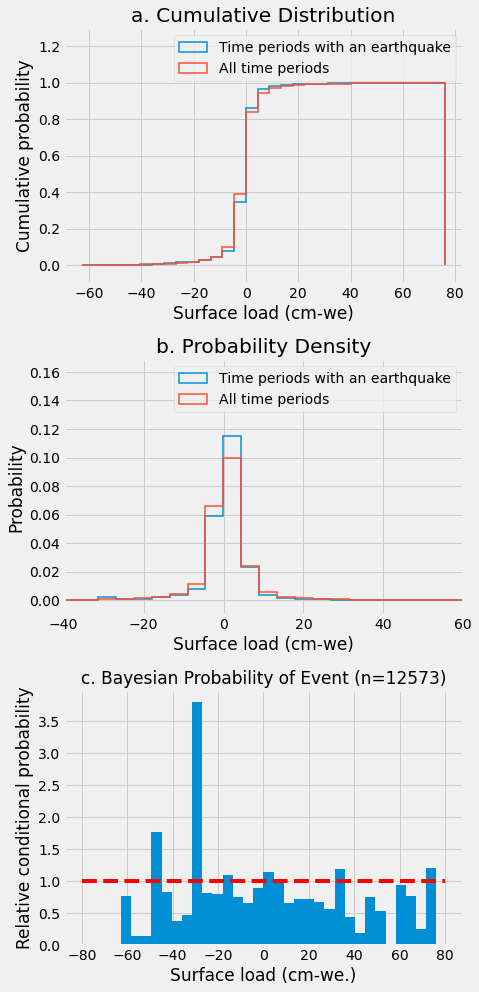

In [10]:
importlib.reload(loadquakes)

def set_of_figures_load(all_time, earthquake_only,bayes_title):

    fig,(ax1,ax2,ax3) = plt.subplots(3,1, figsize=(7,14))

    plt.style.use('fivethirtyeight')
    loadquakes.plot_hist(all_time, earthquake_only, ax1, ax2, 
              'a. Cumulative Distribution', 'b. Probability Density')

    loadquakes.plot_bayes(all_time, earthquake_only, ax3,bayes_title,
                         method='Sturge')

    fig.tight_layout()
    
set_of_figures_load(ds['lwe_thickness'].data.flatten(), catalog.dmass,'c. Bayesian Probability of Event (n=12573)')

## Correlation between mainshocks and surface mass loading

#### Both statistical tests produce p-values < 0.05, which indicate that the two samples are not drawn from the same distribution. This means that the distribution of surface mass load during earthquake occurrence is significantly different from background.

In [11]:
# takes a long time to run (has already been run for 2002-04-16 to 2022-01-16)
# loadquakes.calc_stats(np.array(mainshock.dmass),np.array(ds['lwe_thickness'].data.flatten()))

{'cvm': CramerVonMisesResult(statistic=18.38713838188511, pvalue=3.178242002910281e-09),
 'ks': KstestResult(statistic=0.0833189806824356, pvalue=0.0010844083570850202),
 'median_all': 0.749170696239575,
 'median_eq': array(0.2847398),
 'mean_all': -0.65387517841372,
 'mean_eq': 0.44100372833838036,
 'mean_all_minus_mean_eq': -1.0948789067521003,
 'median_all_minus_median_eq': 0.46443089594810544}

21
20


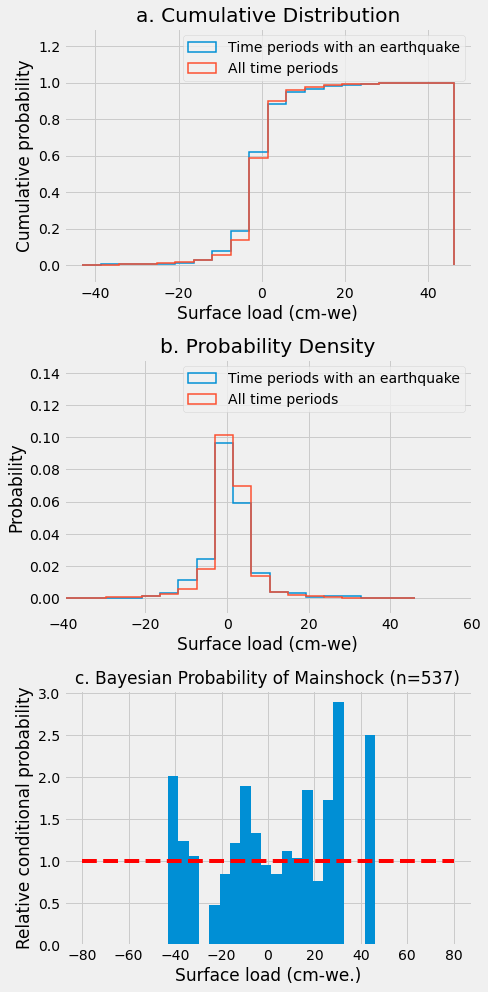

In [49]:
set_of_figures_load(ds['lwe_thickness'].data.flatten(), mainshock.dmass,
                    'c. Bayesian Probability of Mainshock (n=537)')

#### The conditional probability will change quantitatively depending on the bin size. However, the same qualitative distribution remains, where there is a higher relative conditional probability during periods of large loading and unloading. 

#### Here, we calculate the Bayesian probability using two different bin sizes which are calculated via two methods:

##### a. Sturge's Rule
##### b. Freedman-Diaconis Rule


21
20


/home/amand4/.local/lib/python3.9/site-packages/scipy/stats/stats.py:2836: VisibleDeprecationWarning: use of scale='raw' is deprecated, use scale=1.0 instead
  warnings.warn(


71
70


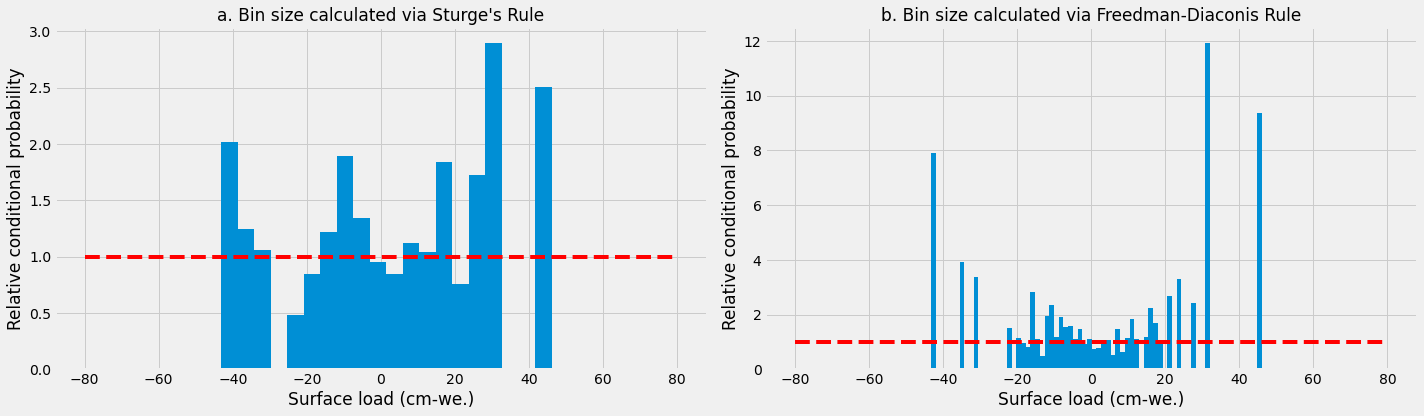

In [16]:
importlib.reload(loadquakes)

fig,(ax1,ax2) = plt.subplots(1,2, figsize=(20,6))

plt.style.use('fivethirtyeight')
    
loadquakes.plot_bayes(ds['lwe_thickness'].data.flatten(), mainshock.dmass, ax1,
                      "a. Bin size calculated via Sturge's Rule", method = 'Sturge')

loadquakes.plot_bayes(ds['lwe_thickness'].data.flatten(), mainshock.dmass, ax2,
                      "b. Bin size calculated via Freedman-Diaconis Rule", method = 'fd')

fig.tight_layout()


## Mapping earthquakes with high conditional probability

### First, calculate the conditional probability of each mainshock

<ipython-input-17-dd635c4c8f2e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mainshock['cp'] = conditional_probability


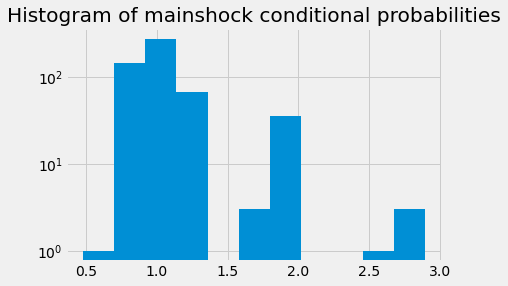

In [17]:
conditional_probability = loadquakes.get_cond_probability(
                            np.array(ds['lwe_thickness'].data.flatten()),
                            np.array(mainshock.dmass), np.array(mainshock.dmass))
mainshock['cp'] = conditional_probability
fig,ax=plt.subplots()
plt.hist(np.array(mainshock['cp']),11)
plt.title('Histogram of mainshock conditional probabilities')
plt.yscale('log')

### Next, map the events that have a conditional probability > 1.5                                       

In [125]:
high = mainshock[mainshock['cp']>1.5]
vhigh = mainshock[mainshock['cp']>2]

In [126]:
high.sort_values('cp')

,target_id,latitude,longitude,time,magnitude,geometry,mc_current,mc_current_above_ref,mu,P_triggered,P_background,zeta_plus_1,dmass,cp
209,211,29.1944,105.3650,2021-09-15 20:33:31.851,5.4,POINT (29.1944 105.365),5.4,0.0,6.907373e-11,0.890814,0.109186,1.0,24.034845793439793,1.725487
8332,8334,25.0390,97.6970,2008-08-21 12:24:30.930,6.0,POINT (25.039 97.697),5.4,0.0,6.907373e-11,0.853446,0.146554,1.0,27.661881541722572,1.725487
5133,5135,60.2330,163.4000,2013-03-13 03:12:52.180,5.8,POINT (60.233 163.4),5.4,0.0,6.907373e-11,0.890949,0.109051,1.0,24.37659419529761,1.725487
200,202,-37.4920,146.3534,2021-09-21 23:15:53.602,5.9,POINT (-37.492 146.3534),5.4,0.0,6.907373e-11,0.055965,0.944035,1.0,15.4419300700577,1.842457
12212,12214,19.3790,94.5130,2002-12-04 11:30:53.780,5.6,POINT (19.379 94.51300000000001),5.4,0.0,6.907373e-11,0.502994,0.497006,1.0,15.756677704159907,1.842457
11761,11763,19.9170,95.6720,2003-09-21 18:16:13.410,6.6,POINT (19.917 95.672),5.4,0.0,6.907373e-11,0.860609,0.139391,1.0,15.17380398021972,1.842457
6256,6258,39.1490,29.1030,2011-05-19 20:15:22.940,5.8,POINT (39.149 29.103),5.4,0.0,6.907373e-11,0.865560,0.134440,1.0,16.459236103539897,1.842457
1885,1887,13.1817,-81.0931,2018-11-25 03:40:50.810,6.0,POINT (13.1817 -81.09310000000001),5.4,0.0,6.907373e-11,0.768005,0.231995,1.0,18.775408190159354,1.842457
12529,12531,-2.9070,33.7330,2002-05-18 15:15:08.800,5.5,POINT (-2.907 33.733),5.4,0.0,6.907373e-11,0.182392,0.817608,1.0,17.13010554239347,1.842457
1510,1512,-18.2242,120.3584,2019-07-14 05:39:23.420,6.6,POINT (-18.2242 120.3584),5.4,0.0,6.907373e-11,0.388103,0.611897,1.0,15.505109390051892,1.842457


In [128]:
high.sort_values('magnitude')

,target_id,latitude,longitude,time,magnitude,geometry,mc_current,mc_current_above_ref,mu,P_triggered,P_background,zeta_plus_1,dmass,cp
4582,4584,4.1909,86.7252,2014-03-27 04:00:15.540,5.4,POINT (4.1909 86.7252),5.4,0.0,6.907373e-11,0.756849,0.243151,1.0,-11.71227395695825,1.894726
209,211,29.1944,105.3650,2021-09-15 20:33:31.851,5.4,POINT (29.1944 105.365),5.4,0.0,6.907373e-11,0.890814,0.109186,1.0,24.034845793439793,1.725487
10596,10598,7.1020,-34.1200,2005-03-24 07:33:53.040,5.4,POINT (7.102 -34.12),5.4,0.0,6.907373e-11,0.532074,0.467926,1.0,-7.5961758629257226,1.894726
3230,3232,41.4928,-29.3334,2016-07-14 08:36:29.110,5.4,POINT (41.4928 -29.3334),5.4,0.0,6.907373e-11,0.614368,0.385632,1.0,-7.638740556081757,1.894726
1874,1876,27.1986,96.9185,2018-11-28 10:17:06.970,5.4,POINT (27.1986 96.91849999999999),5.4,0.0,6.907373e-11,0.880594,0.119406,1.0,-11.787422681037986,1.894726
11826,11828,29.5730,95.6050,2003-08-18 09:03:03.520,5.5,POINT (29.573 95.605),5.4,0.0,6.907373e-11,0.585476,0.414524,1.0,31.84687742437117,2.893376
11315,11317,12.7020,-44.4900,2004-05-11 23:58:54.410,5.5,POINT (12.702 -44.49),5.4,0.0,6.907373e-11,0.887444,0.112556,1.0,-8.232435619738212,1.894726
7903,7905,10.2000,-67.0100,2009-05-04 09:10:20.900,5.5,POINT (10.2 -67.01000000000001),5.4,0.0,6.907373e-11,0.309759,0.690241,1.0,-9.169754498940996,1.894726
4410,4412,40.3731,51.5739,2014-06-07 06:05:29.910,5.5,POINT (40.3731 51.5739),5.4,0.0,6.907373e-11,0.792073,0.207927,1.0,-43.05570164414012,2.014502
3825,3827,29.0402,34.6672,2015-06-27 15:34:03.960,5.5,POINT (29.0402 34.6672),5.4,0.0,6.907373e-11,0.146537,0.853463,1.0,-7.719402094394657,1.894726


In [127]:
vhigh.sort_values('cp')

,target_id,latitude,longitude,time,magnitude,geometry,mc_current,mc_current_above_ref,mu,P_triggered,P_background,zeta_plus_1,dmass,cp
4410,4412,40.3731,51.5739,2014-06-07 06:05:29.910,5.5,POINT (40.3731 51.5739),5.4,0.0,6.907373e-11,0.792073,0.207927,1.0,-43.05570164414012,2.014502
3125,3127,-1.0355,31.6181,2016-09-10 12:27:33.410,5.9,POINT (-1.0355 31.6181),5.4,0.0,6.907373e-11,0.470086,0.529914,1.0,45.98749350911166,2.503263
10466,10468,28.8810,94.6260,2005-06-01 20:06:41.450,5.8,POINT (28.881 94.626),5.4,0.0,6.907373e-11,0.796710,0.203290,1.0,31.35207431117368,2.893376
11826,11828,29.5730,95.6050,2003-08-18 09:03:03.520,5.5,POINT (29.573 95.605),5.4,0.0,6.907373e-11,0.585476,0.414524,1.0,31.84687742437117,2.893376
11862,11864,22.8540,92.3060,2003-07-26 23:18:17.960,5.7,POINT (22.854 92.306),5.4,0.0,6.907373e-11,0.891394,0.108606,1.0,31.68322316970908,2.893376


In [129]:
vhigh.sort_values('magnitude')

,target_id,latitude,longitude,time,magnitude,geometry,mc_current,mc_current_above_ref,mu,P_triggered,P_background,zeta_plus_1,dmass,cp
4410,4412,40.3731,51.5739,2014-06-07 06:05:29.910,5.5,POINT (40.3731 51.5739),5.4,0.0,6.907373e-11,0.792073,0.207927,1.0,-43.05570164414012,2.014502
11826,11828,29.5730,95.6050,2003-08-18 09:03:03.520,5.5,POINT (29.573 95.605),5.4,0.0,6.907373e-11,0.585476,0.414524,1.0,31.84687742437117,2.893376
11862,11864,22.8540,92.3060,2003-07-26 23:18:17.960,5.7,POINT (22.854 92.306),5.4,0.0,6.907373e-11,0.891394,0.108606,1.0,31.68322316970908,2.893376
10466,10468,28.8810,94.6260,2005-06-01 20:06:41.450,5.8,POINT (28.881 94.626),5.4,0.0,6.907373e-11,0.796710,0.203290,1.0,31.35207431117368,2.893376
3125,3127,-1.0355,31.6181,2016-09-10 12:27:33.410,5.9,POINT (-1.0355 31.6181),5.4,0.0,6.907373e-11,0.470086,0.529914,1.0,45.98749350911166,2.503263


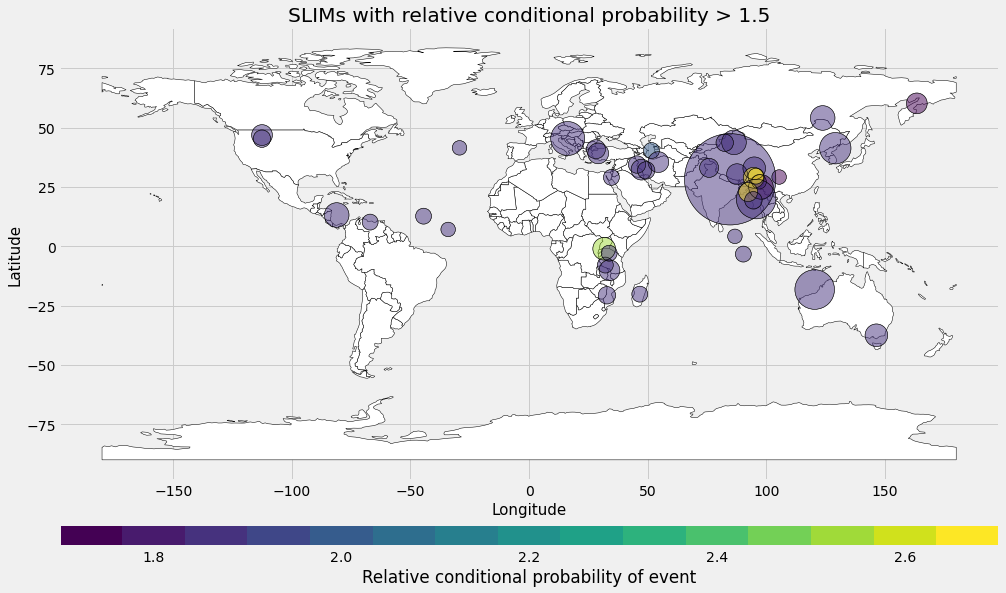

In [109]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm as cm

events_highcp = mainshock[mainshock['cp']>1.5]

def probability_map_cb(events,color,label):

    gdf = gpd.GeoDataFrame(events,
                           geometry=gpd.points_from_xy(events.longitude, 
                                                       events.latitude))
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    ax = world.plot(color='white', edgecolor='black', figsize=(15,10))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("bottom", size="5%", pad=0.6)
    cmap = cm.get_cmap('viridis', 15)    # 11 discrete colors
    gdf.plot(ax=ax,cax=cax,alpha=0.5,column=color,cmap=cmap,legend=True,
             edgecolor='k',
             markersize = 1e-5*(events.magnitude)**10,
             legend_kwds={'label': "Relative conditional probability of event",
                            'orientation': "horizontal"},
            vmax=2.7,
            vmin=1.7)
    gdf.plot(ax=ax,facecolor="None",
         edgecolor='k',
         markersize = 1e-5*(events.magnitude)**10)
    ax.set_xlabel('Longitude', fontsize = 15)
    ax.set_ylabel("Latitude", fontsize = 15)
    ax.set_title(label)
    plt.show()

probability_map_cb(events_highcp,events_highcp.cp,
                'SLIMs with relative conditional probability > 1.5')

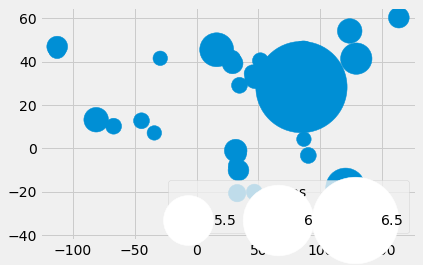

In [67]:
fig, ax = plt.subplots()

s=1e-5*(events_highcp.magnitude)**10
# s=events_highcp.magnitude
scatter = ax.scatter(events_highcp.longitude,events_highcp.latitude, s=s)

# produce a legend with a cross section of sizes from the scatter
kw = dict(prop="sizes", num=4, color='w',
          func=lambda s: s)
handles, labels = scatter.legend_elements(**kw) 
labels = ['$\\mathdefault{5.5}$',
          '$\\mathdefault{6}$',
          '$\\mathdefault{6.5}$',
          '$\\mathdefault{7}$']

legend2 = ax.legend(handles, labels, loc="lower right", title="Sizes",ncol=4,labelspacing=1)

plt.show()

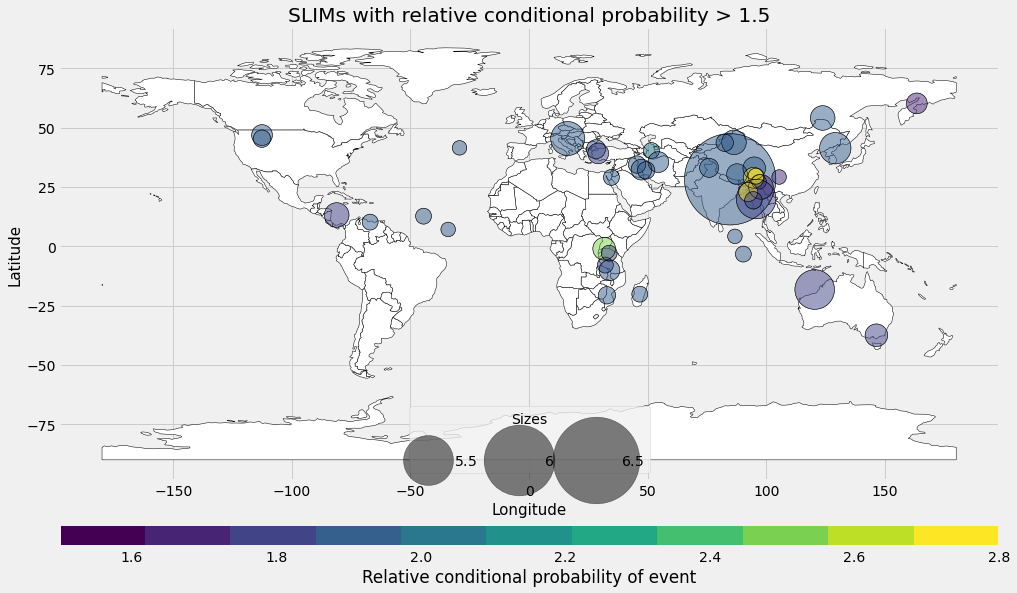

In [68]:
events_highcp = mainshock[mainshock['cp']>1.5]

def probability_map_cb(events,color,label):

    gdf = gpd.GeoDataFrame(events,
                           geometry=gpd.points_from_xy(events.longitude, 
                                                       events.latitude))
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    ax = world.plot(color='white', edgecolor='black', figsize=(15,10))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("bottom", size="5%", pad=0.6)
    cmap = cm.get_cmap('viridis', 11)    # 11 discrete colors
    gdf.plot(ax=ax,cax=cax,alpha=0.5,column=color,cmap=cmap,legend=True,
             edgecolor='k',
             markersize = 1e-5*(events.magnitude)**10,
             legend_kwds={'label': "Relative conditional probability of event",
                            'orientation': "horizontal"},
            vmax=2.8,
            vmin=1.5)
    gdf.plot(ax=ax,facecolor="None",
         edgecolor='k',
         markersize = 1e-5*(events.magnitude)**10)
    
    # legend for magnitude
    
    kw = dict(prop="sizes", num=4, alpha=0.5,
          func=lambda s: s)
    handles, labels = scatter.legend_elements(**kw) 
    labels = ['$\\mathdefault{5.5}$',
          '$\\mathdefault{6}$',
          '$\\mathdefault{6.5}$',
          '$\\mathdefault{7}$']

    legend2 = ax.legend(handles, labels, loc="lower center", title="Sizes",ncol=4,labelspacing=2, frameon=True)
    
    ax.set_xlabel('Longitude', fontsize = 15)
    ax.set_ylabel("Latitude", fontsize = 15)
    ax.set_title(label)
    plt.show()

probability_map_cb(events_highcp,events_highcp.cp,
                'SLIMs with relative conditional probability > 1.5')

# Correlation between earthquakes and random data
##### *mean and std deviation of random array same as GRACE data 

In [39]:
np.mean(ds['lwe_thickness'])

<xarray.DataArray 'lwe_thickness' ()>
array(-0.65387518)

In [40]:
np.std(ds['lwe_thickness'])

<xarray.DataArray 'lwe_thickness' ()>
array(25.49255185)

In [41]:
random_load1 = np.random.normal(loc=-0.65387518, scale=25.49255185, size=(205, 360, 720))

In [42]:
ds_random = ds

In [43]:
ds_random = ds_random.assign(load=ds_random['lwe_thickness'] - ds_random['lwe_thickness'] + random_load1)

In [44]:
# earthquake catalog

mainshock_random = catalog[catalog['P_triggered']<.9]

In [45]:
def get_mass_random(eq):
    mass_change = ds_random.sel(lat=(eq["latitude"]),lon=(eq["longitude"]),time=(eq["time"]), method="nearest")
    mass_change = mass_change["load"]
    return mass_change.data
  
mainshock_random['dmass'] = mainshock_random.apply(lambda row: get_mass_random(row), axis=1)

<ipython-input-45-1efc1d20fd8f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mainshock_random['dmass'] = mainshock_random.apply(lambda row: get_mass_random(row), axis=1)


21
20


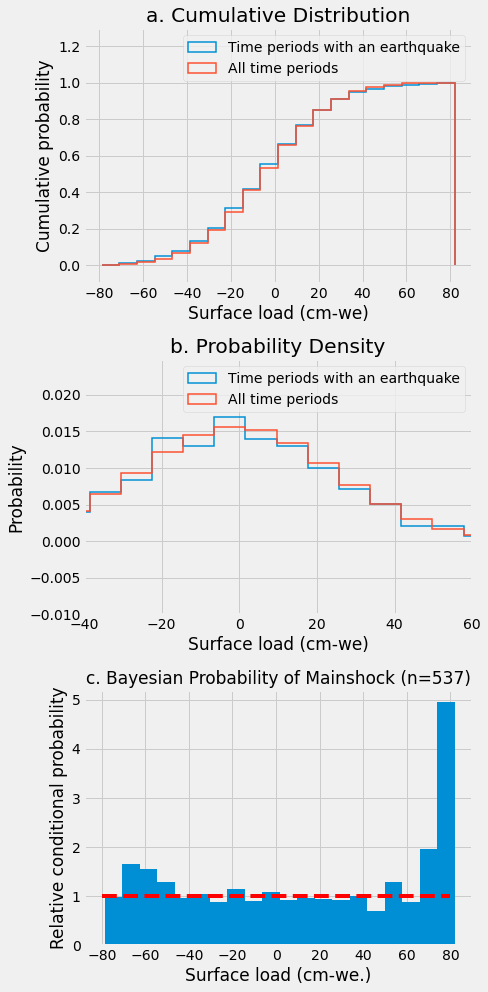

In [47]:
set_of_figures_load(ds_random['load'].data.flatten(), mainshock_random.dmass,'c. Bayesian Probability of Mainshock (n=537)')

In [48]:
stats.ks_2samp(mainshock_random.dmass,ds_random['load'].data.flatten())

KstestResult(statistic=0.02809723441818529, pvalue=0.7793204181206957)